In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import tempfile
import tensorflow as tf
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, precision_recall_curve

from imblearn.over_sampling import SMOTE

Load the data

In [3]:
df = pd.read_csv('drive/MyDrive/Fraud.csv')

## Data Visualisation

In [ ]:
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [ ]:
df.shape

(6362620, 11)

In [4]:
con_cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'step', 'oldbalanceDest', 'newbalanceDest']
cust_cols = ['nameOrig', 'nameDest']

In [ ]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
df['amount'].describe()

count    6.362620e+06
mean     1.798619e+05
std      6.038582e+05
min      0.000000e+00
25%      1.338957e+04
50%      7.487194e+04
75%      2.087215e+05
max      9.244552e+07
Name: amount, dtype: float64

In [ ]:
df[df['amount']==0]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736447,212,CASH_OUT,0.0,C1510987794,0.0,0.0,C1696624817,0.00,0.00,1,0
3247298,250,CASH_OUT,0.0,C521393327,0.0,0.0,C480398193,0.00,0.00,1,0
3760289,279,CASH_OUT,0.0,C539112012,0.0,0.0,C1106468520,538547.63,538547.63,1,0
5563714,387,CASH_OUT,0.0,C1294472700,0.0,0.0,C1325541393,7970766.57,7970766.57,1,0
5996408,425,CASH_OUT,0.0,C832555372,0.0,0.0,C1462759334,76759.90,76759.90,1,0
5996410,425,CASH_OUT,0.0,C69493310,0.0,0.0,C719711728,2921531.34,2921531.34,1,0
6168500,554,CASH_OUT,0.0,C10965156,0.0,0.0,C1493336195,230289.66,230289.66,1,0
6205440,586,CASH_OUT,0.0,C1303719003,0.0,0.0,C900608348,1328472.86,1328472.86,1,0
6266414,617,CASH_OUT,0.0,C1971175979,0.0,0.0,C1352345416,0.00,0.00,1,0
6281483,646,CASH_OUT,0.0,C2060908932,0.0,0.0,C1587892888,0.00,0.00,1,0


In [ ]:
df.nunique()

step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64

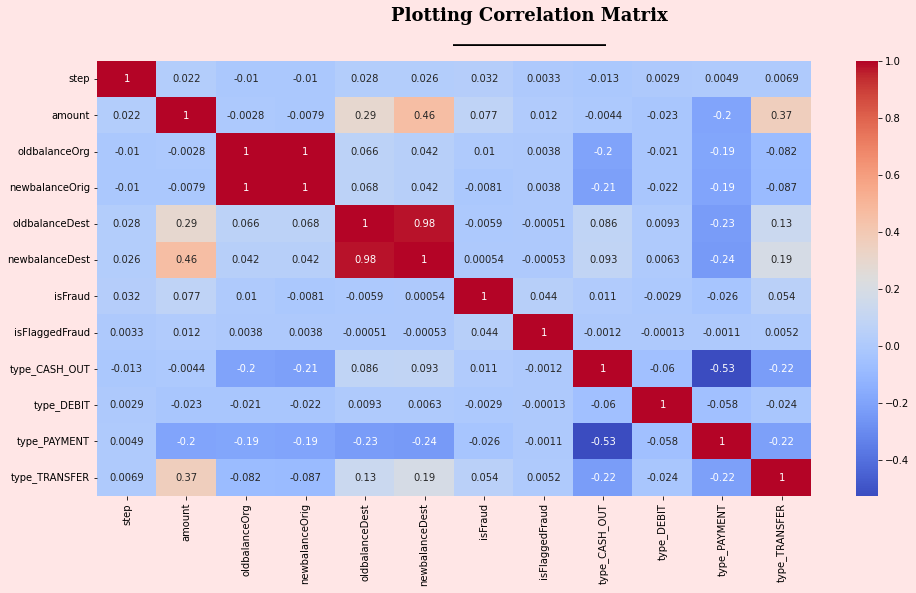

In [ ]:
# Converting categorical object type to sparse matrix
corr_data = pd.get_dummies(df, columns=['type'], drop_first=True)

corr_matrix = corr_data.corr()

fig=plt.figure(figsize=(16, 8))
fig.suptitle('Plotting Correlation Matrix\n_________________', y=0.94, horizontalalignment='center', verticalalignment='center',fontsize=18, fontweight='bold',
              fontfamily='serif', color="black")
background_color = "#ffe6e6"
fig.patch.set_facecolor(background_color)

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

Amount, isFlaggedFraud and type-(cashout, transfer) are correlated with fraud cases

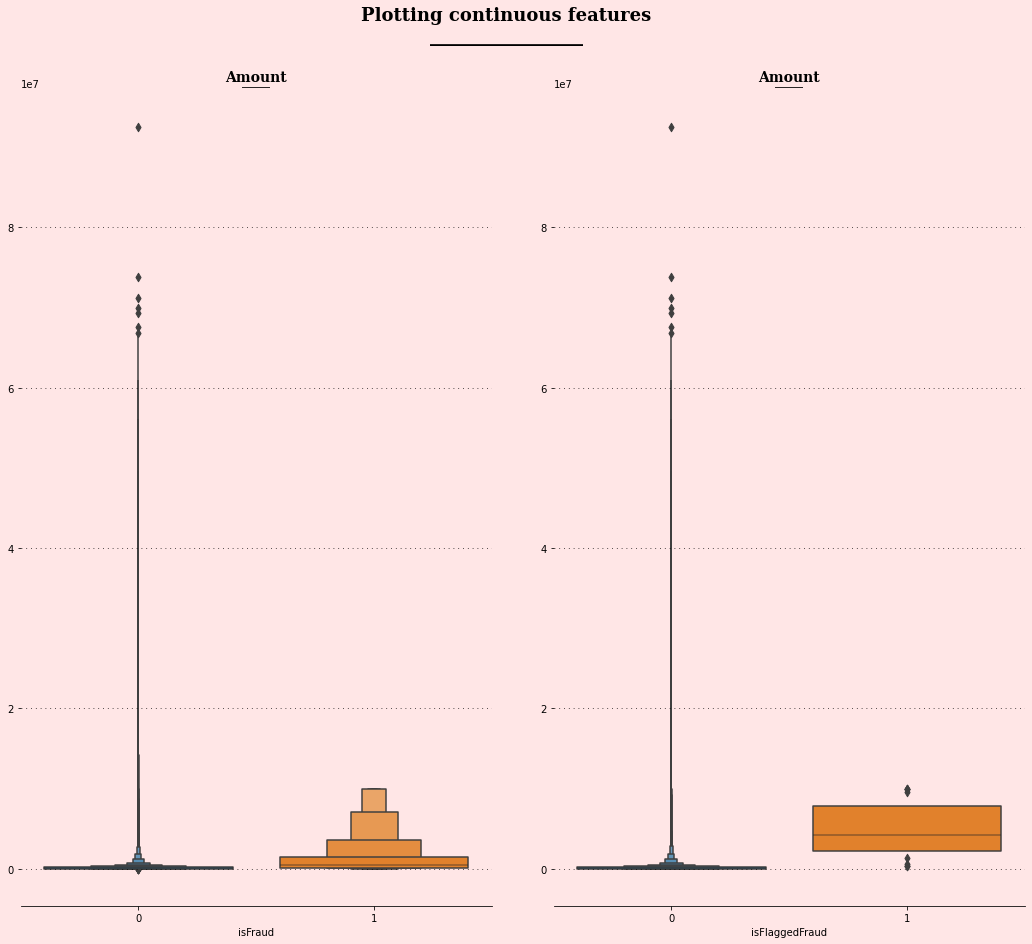

In [ ]:
fig=plt.figure(figsize=(18,15))
gs=fig.add_gridspec(2,4)
gs.update(wspace=0.3, hspace=0.15)
ax1 = fig.add_subplot(gs[0:, 0:2])
ax2 = fig.add_subplot(gs[0:, 2:4])

fig.suptitle('Plotting continuous features\n_________________', y=0.94, horizontalalignment='center', verticalalignment='center',fontsize=18, fontweight='bold',
              fontfamily='serif', color="black")
background_color = "#ffe6e6"
fig.patch.set_facecolor(background_color)

def plot_amount(ax, x):
  ax.set_title('Amount\n____', linespacing=0, fontsize=14, fontweight='bold', fontfamily='serif')
  sns.boxenplot(data=df, x=f'{x}', y='amount', ax=ax)
  ax.grid(color='black', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
  ax.set_ylabel(None)
  ax.set_facecolor(background_color)
  for borders in ["top","right","left"]:
    ax.spines[borders].set_visible(False)

plot_amount(ax1, 'isFraud')
plot_amount(ax2, 'isFlaggedFraud')

We know any 'TRANSFER' greater than 200,000 is to be flagged fraud by the business model.
So, dropping all rows which have amount transferred greater 200,000 but are not flagged fraud by the model.
Also there seems to be some 0 amount transactions in the data, so we have to drop those too.

In [5]:
large_amt = df[df['amount']>200000]
large_amt = large_amt[large_amt['isFlaggedFraud'] == 0]
large_amt = large_amt[large_amt['type'] == 'TRANSFER']
print(large_amt.shape)
df = pd.concat([df, large_amt]).drop_duplicates(keep=False)

(409094, 11)


In [6]:
zero_amt = df[df['amount'] == 0]
print(zero_amt.shape)
df = pd.concat([df, zero_amt]).drop_duplicates(keep=False)

(16, 11)


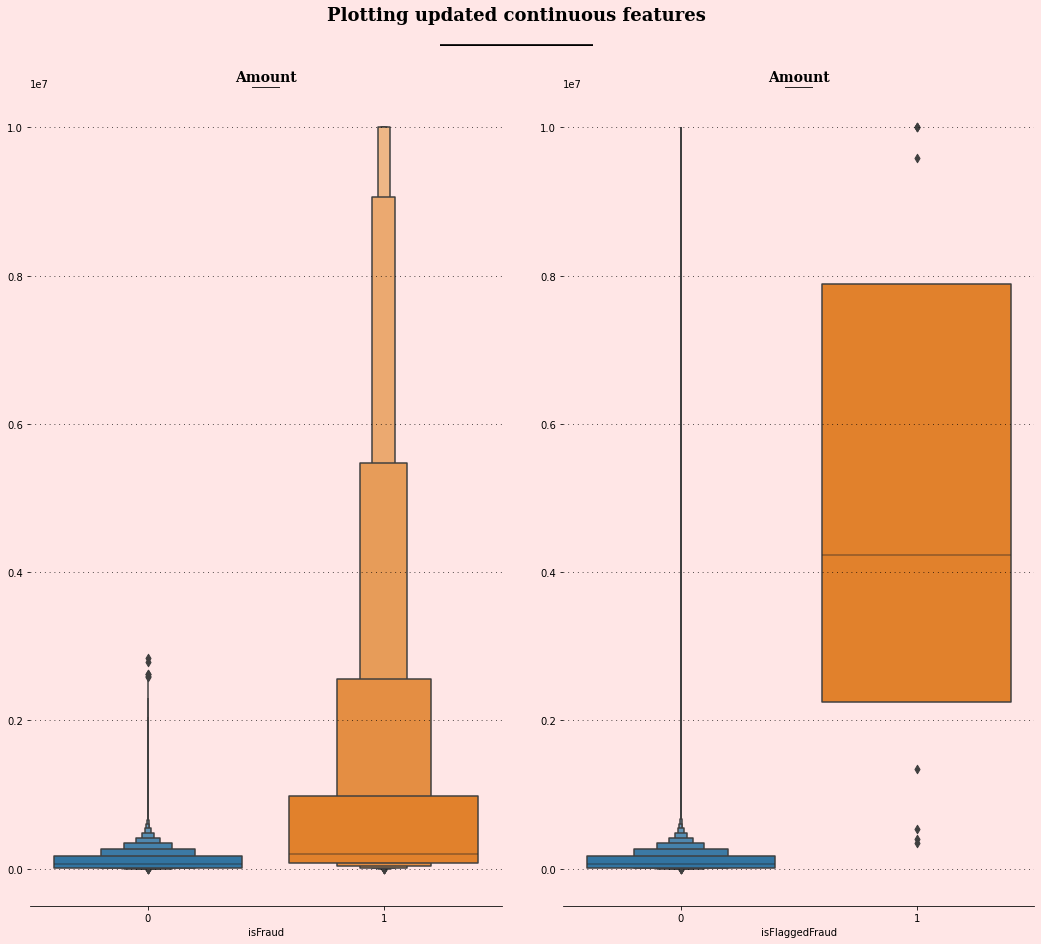

In [ ]:
fig=plt.figure(figsize=(18,15))
gs=fig.add_gridspec(2,4)
gs.update(wspace=0.3, hspace=0.15)
ax1 = fig.add_subplot(gs[0:, 0:2])
ax2 = fig.add_subplot(gs[0:, 2:4])

fig.suptitle('Plotting updated continuous features\n_________________', y=0.94, horizontalalignment='center', verticalalignment='center',fontsize=18, fontweight='bold',
              fontfamily='serif', color="black")
background_color = "#ffe6e6"
fig.patch.set_facecolor(background_color)

plot_amount(ax1, 'isFraud')
plot_amount(ax2, 'isFlaggedFraud')

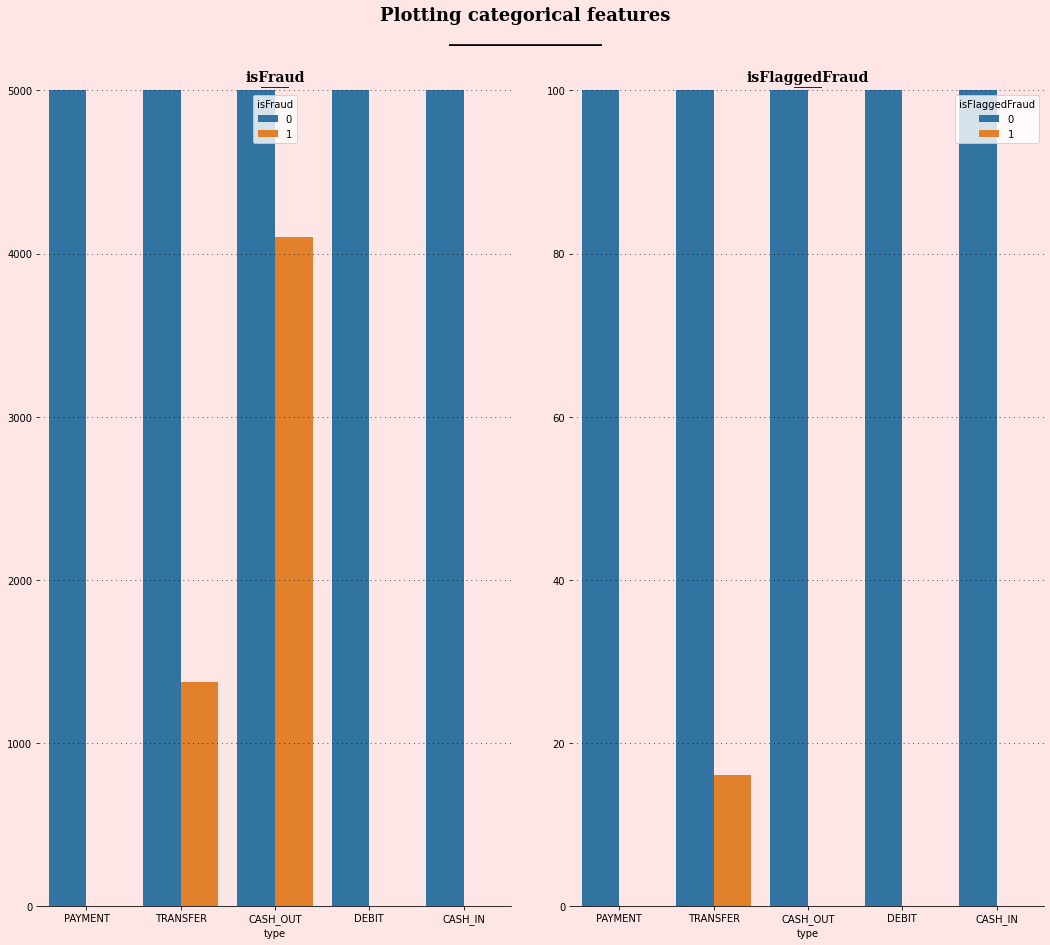

In [ ]:
fig=plt.figure(figsize=(18,15))
gs=fig.add_gridspec(2,4)
gs.update(wspace=0.3, hspace=0.15)
ax1 = fig.add_subplot(gs[0:, 0:2])
ax2 = fig.add_subplot(gs[0:, 2:4])

fig.suptitle('Plotting categorical features\n_________________', y=0.94, horizontalalignment='center', verticalalignment='center',fontsize=18, fontweight='bold',
              fontfamily='serif', color="black")
background_color = "#ffe6e6"
fig.patch.set_facecolor(background_color)

def plot_type(ax, hue):
  ax.set_title(f'{hue}''\n____', linespacing=0, fontsize=14, fontweight='bold', fontfamily='serif')
  sns.countplot(data=df, x='type', hue=f'{hue}', ax=ax)
  ax.grid(color='black', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
  if ax == ax2:
    ax.set_ylim(0, 100)
  else:
    ax.set_ylim(0, 5000)
  ax.set_ylabel(None)
  ax.set_facecolor(background_color)
  for borders in ["top","right","left"]:
    ax.spines[borders].set_visible(False)

plot_type(ax1, 'isFraud')
plot_type(ax2, 'isFlaggedFraud')

**Frauds are being done only in Transfering to another account or in Cash Out**

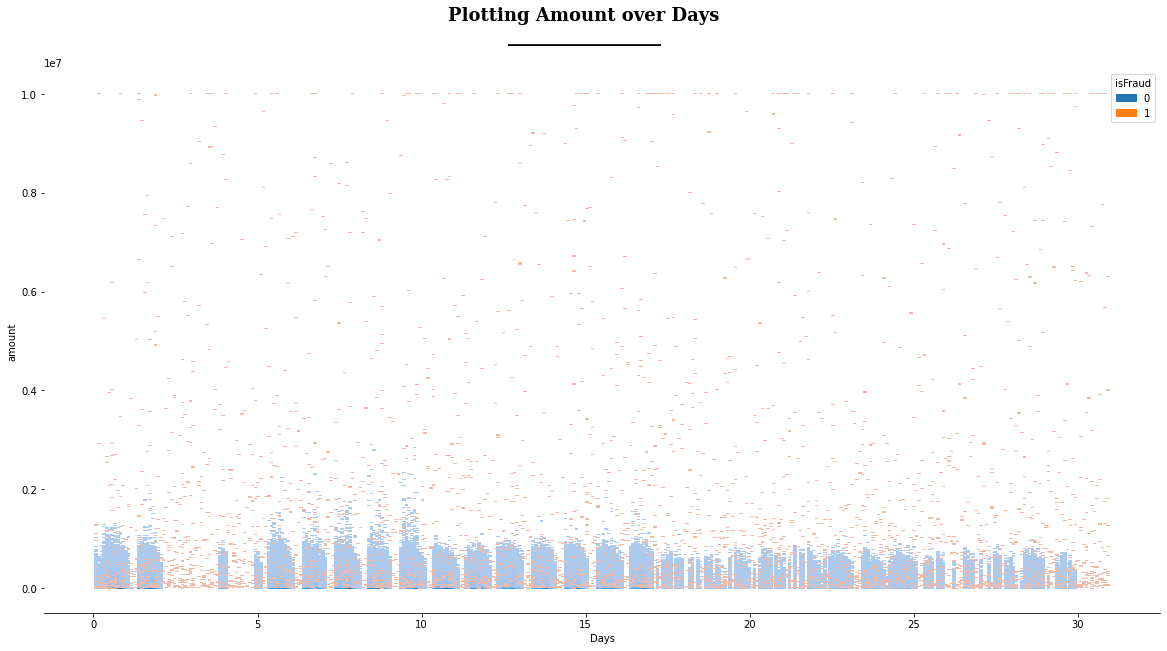

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))

fig.suptitle('Plotting Amount over Days\n_________________', y=0.94, horizontalalignment='center', verticalalignment='center',fontsize=18, fontweight='bold',
              fontfamily='serif', color="black")
# background_color = "#ffe6e6"
# fig.patch.set_facecolor(background_color)
# ax.set_facecolor(background_color)

sns.histplot(x=df['step']/24, y=df['amount'], hue=df['isFraud'], ax=ax, kde=True)
ax.set_xlabel('Days')
for borders in ["top","right","left"]:
  ax.spines[borders].set_visible(False)

**No specific day for fraud transactions**

### Check if any Merchant transaction involved in fraudulent cases

In [ ]:
nameDestMerchant = []
for index in df['nameDest'].to_numpy():
  nameDestMerchant.append(int(index.startswith('M')))

df['nameDestMerchant'] = nameDestMerchant

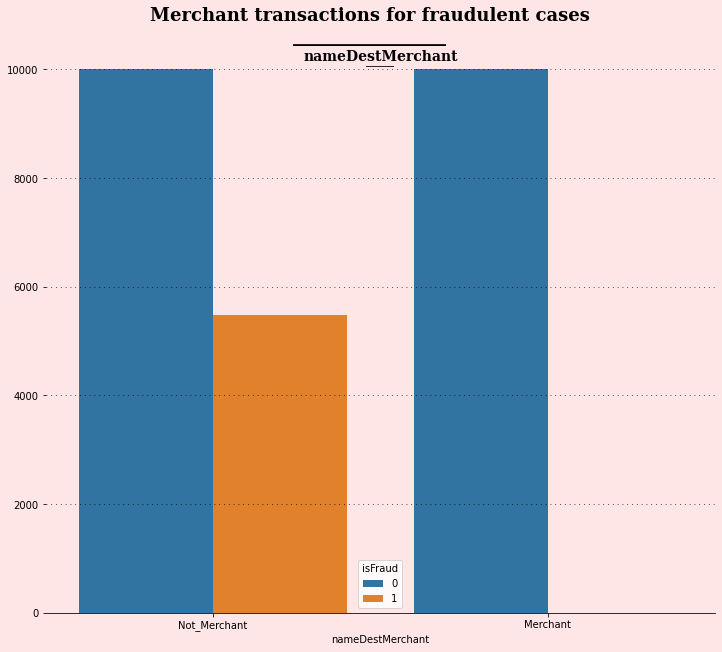

In [ ]:
fig, ax = plt.subplots(figsize=(12,10))
fig.suptitle('Merchant transactions for fraudulent cases\n_________________', y=0.94, horizontalalignment='center', verticalalignment='center',fontsize=18, fontweight='bold',
              fontfamily='serif', color="black")
background_color = "#ffe6e6"
fig.patch.set_facecolor(background_color)

ax.set_title('nameDestMerchant\n____', linespacing=0, fontsize=14, fontweight='bold', fontfamily='serif')
sns.countplot(data=df, x='nameDestMerchant', hue='isFraud', ax=ax)
ax.grid(color='black', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax.set_ylim(0, 10000)
ax.set_ylabel(None)
ax.set_xticks([0, 1])
ax.set_xticklabels(['Not_Merchant', 'Merchant'])
ax.set_facecolor(background_color)
for borders in ["top","right","left"]:
  ax.spines[borders].set_visible(False)

In [ ]:
df.drop(columns = ['nameDestMerchant'], inplace=True)

**No Merchants involved in Fraudulent cases**

## Creating train test dataset

In [ ]:
df1=pd.get_dummies(df, columns = ['type'], drop_first = True)

In [ ]:
df1.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0,0,1,0
1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0,0,1,0
2,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0,0,0,1
3,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,1,0,0,0
4,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0,0,1,0


In [ ]:
y = df1.pop('isFraud').astype('uint8').to_numpy()
X = df1.drop(columns=cust_cols, inplace=False)
X['isFlaggedFraud'] = X['isFlaggedFraud'].astype('uint8')

In [ ]:
len(y[y==1])

5473

In [ ]:
X.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,1,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, stratify=y_train, random_state=42)

In [ ]:
std_scaler = StandardScaler()
X_train[con_cols] = std_scaler.fit_transform(X_train[con_cols])
X_test[con_cols] = std_scaler.transform(X_test[con_cols])
X_val[con_cols] = std_scaler.transform(X_val[con_cols])

In [ ]:
X_train.shape

(4822343, 11)

# Creating and Training Model

### Baseline Model

In [ ]:
metrics = [
      tf.keras.metrics.TruePositives(name='tp'),
      tf.keras.metrics.FalsePositives(name='fp'),
      tf.keras.metrics.TrueNegatives(name='tn'),
      tf.keras.metrics.FalseNegatives(name='fn'), 
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
      tf.keras.metrics.AUC(name='auc'),
      tf.keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

def make_model(metrics=metrics, output_bias=None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = tf.keras.Sequential([
      tf.keras.layers.Dense(6, activation='relu', input_shape=(11,)),
      tf.keras.layers.Dropout(0.5),
      tf.keras.layers.Dense(1, activation='sigmoid', bias_initializer=output_bias),
  ])

  model.compile(
      optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3),
      loss = tf.keras.losses.BinaryCrossentropy(),
      metrics=metrics)

  return model    

In [ ]:
initial_bias = np.log((len(y[y==1]))/(len(y[y==0])))
print(initial_bias)

-6.990989615977263


In [ ]:
model = make_model(output_bias=initial_bias)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 6)                 72        
                                                                 
 dropout (Dropout)           (None, 6)                 0         
                                                                 
 dense_5 (Dense)             (None, 1)                 7         
                                                                 
Total params: 79
Trainable params: 79
Non-trainable params: 0
_________________________________________________________________


To make the various training runs more comparable, keeping this initial model's weights in a checkpoint file, and load them into each model before training

In [ ]:
initial_weights = os.path.join(tempfile.mkdtemp(), 'initial_weights')
model.save_weights(initial_weights)

In [ ]:
callbacks = [
             tf.keras.callbacks.ModelCheckpoint('fraud_detection_model.keras',
                                                monitor='val_prc',
                                                save_best_only=True,
                                                mode='max'),
             tf.keras.callbacks.EarlyStopping(monitor='val_prc',
                                              verbose=1,
                                              patience=10,
                                              mode='max',
                                              restore_best_weights=True)
]

In [ ]:
history = model.fit(X_train, y_train, 2048, 100, callbacks=callbacks, validation_data=(X_val, y_val))

Epoch 1/100
2355/2355 [==============================] - 20s 7ms/step - loss: 0.0071 - tp: 236.0000 - fp: 177.0000 - tn: 4817733.0000 - fn: 4197.0000 - accuracy: 0.9991 - precision: 0.5714 - recall: 0.0532 - auc: 0.6055 - prc: 0.0704 - val_loss: 0.0052 - val_tp: 41.0000 - val_fp: 0.0000e+00 - val_tn: 535323.0000 - val_fn: 452.0000 - val_accuracy: 0.9992 - val_precision: 1.0000 - val_recall: 0.0832 - val_auc: 0.7127 - val_prc: 0.2613
Epoch 2/100
2355/2355 [==============================] - 15s 6ms/step - loss: 0.0056 - tp: 452.0000 - fp: 26.0000 - tn: 4817884.0000 - fn: 3981.0000 - accuracy: 0.9992 - precision: 0.9456 - recall: 0.1020 - auc: 0.6697 - prc: 0.1616 - val_loss: 0.0049 - val_tp: 47.0000 - val_fp: 0.0000e+00 - val_tn: 535323.0000 - val_fn: 446.0000 - val_accuracy: 0.9992 - val_precision: 1.0000 - val_recall: 0.0953 - val_auc: 0.7331 - val_prc: 0.3065
Epoch 3/100
2355/2355 [==============================] - 17s 7ms/step - loss: 0.0055 - tp: 496.0000 - fp: 21.0000 - tn: 4817889

In [ ]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

def plot_metrics(history):
  metrics = ['loss', 'prc', 'precision', 'recall']
  plt.figure(figsize=(9, 9))
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[1], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)

    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend();
  plt.show()

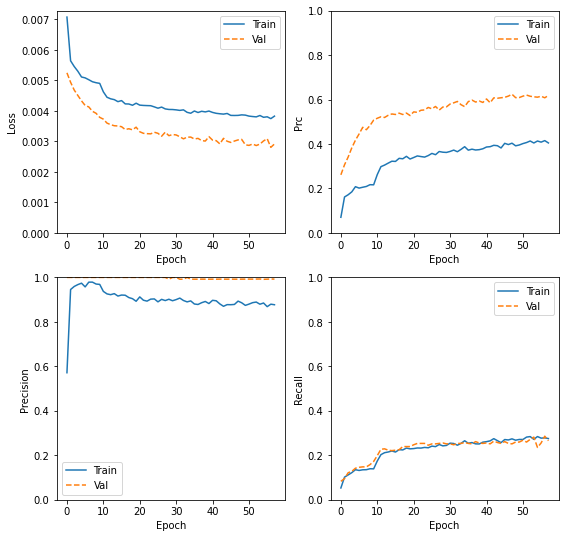

In [ ]:
plot_metrics(history)

In [ ]:
test_metrics = model.evaluate(X_test, y_test, 2048)
test_predictions = model.predict(X_test, 2048)
np.rint(test_predictions, test_predictions)
test_predictions = test_predictions.astype('uint8')

train_predictions = model.predict(X_train, 2048)
np.rint(train_predictions, train_predictions)
train_predictions = train_predictions.astype('uint8')

291/291 [==============================] - 2s 5ms/step - loss: 0.0031 - tp: 125.0000 - fp: 0.0000e+00 - tn: 594804.0000 - fn: 422.0000 - accuracy: 0.9993 - precision: 1.0000 - recall: 0.2285 - auc: 0.9146 - prc: 0.6002


loss :  0.0031295449007302523
tp :  125.0
fp :  0.0
tn :  594804.0
fn :  422.0
accuracy :  0.999291181564331
precision :  1.0
recall :  0.22851920127868652
auc :  0.9146115779876709
prc :  0.6001986861228943


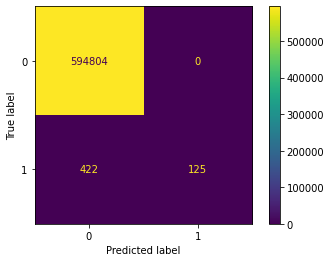

In [ ]:
for metric_name, metric_value in zip(model.metrics_names, test_metrics):
  print(metric_name, ": ", metric_value)

ConfusionMatrixDisplay.from_predictions(y_test, test_predictions)
plt.show()

### Training model with class weights 

**Calculating class weights**

In [ ]:
weight_for_0 = (1 / len(y[y==0])) * (len(y) / 2.0)
weight_for_1 = (1 / len(y[y==1])) * (len(y) / 2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.50
Weight for class 1: 543.90


In [ ]:
weighted_model = make_model()
weighted_model.load_weights(initial_weights)

weighted_history = weighted_model.fit(X_train, y_train, 2048, 100, callbacks=callbacks, validation_data=(X_val, y_val),
                                      class_weight=class_weight)

Epoch 1/100
2355/2355 [==============================] - 18s 7ms/step - loss: 2.2258 - tp: 1390.0000 - fp: 247842.0000 - tn: 5164872.0000 - fn: 3590.0000 - accuracy: 0.9536 - precision: 0.0056 - recall: 0.2791 - auc: 0.6710 - prc: 0.0074 - val_loss: 0.1184 - val_tp: 274.0000 - val_fp: 13134.0000 - val_tn: 522189.0000 - val_fn: 219.0000 - val_accuracy: 0.9751 - val_precision: 0.0204 - val_recall: 0.5558 - val_auc: 0.9087 - val_prc: 0.1681
Epoch 2/100
2355/2355 [==============================] - 15s 7ms/step - loss: 0.9765 - tp: 2487.0000 - fp: 612564.0000 - tn: 4205346.0000 - fn: 1946.0000 - accuracy: 0.8726 - precision: 0.0040 - recall: 0.5610 - auc: 0.7939 - prc: 0.0109 - val_loss: 0.1918 - val_tp: 358.0000 - val_fp: 36863.0000 - val_tn: 498460.0000 - val_fn: 135.0000 - val_accuracy: 0.9310 - val_precision: 0.0096 - val_recall: 0.7262 - val_auc: 0.9265 - val_prc: 0.3021
Epoch 3/100
2355/2355 [==============================] - 16s 7ms/step - loss: 0.6792 - tp: 2759.0000 - fp: 686476.00

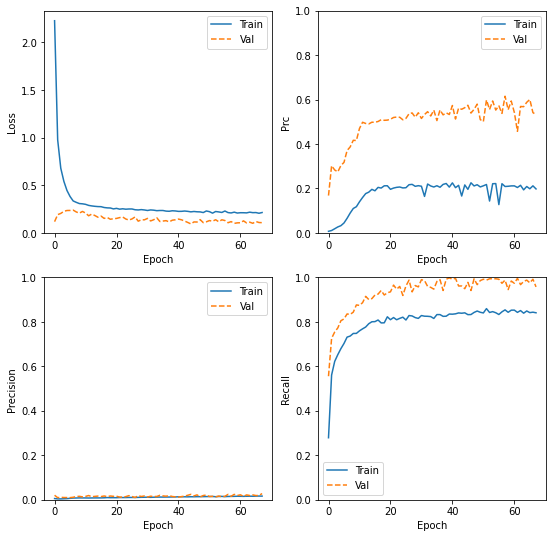

In [ ]:
plot_metrics(weighted_history)

In [ ]:
test_metrics_weighted = weighted_model.evaluate(X_test, y_test, 2048)
test_predictions_weighted = weighted_model.predict(X_test, 2048)
np.rint(test_predictions_weighted, test_predictions_weighted)
test_predictions_weighted = test_predictions_weighted.astype('uint8')

train_predictions_weighted = weighted_model.predict(X_train, 2048)
np.rint(train_predictions_weighted, train_predictions_weighted)
train_predictions_weighted = train_predictions_weighted.astype('uint8')

291/291 [==============================] - 2s 6ms/step - loss: 0.1198 - tp: 535.0000 - fp: 34035.0000 - tn: 560769.0000 - fn: 12.0000 - accuracy: 0.9428 - precision: 0.0155 - recall: 0.9781 - auc: 0.9900 - prc: 0.5973


loss :  0.11983731389045715
tp :  535.0
fp :  34035.0
tn :  560769.0
fn :  12.0
accuracy :  0.942811906337738
precision :  0.015475845895707607
recall :  0.9780621528625488
auc :  0.9900394082069397
prc :  0.5973243117332458


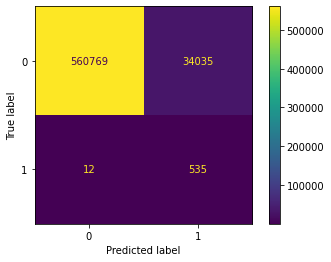

In [ ]:
for metric_name, metric_value in zip(weighted_model.metrics_names, test_metrics_weighted):
  print(metric_name, ": ", metric_value)

ConfusionMatrixDisplay.from_predictions(y_test, test_predictions_weighted)
plt.show()

### Oversampling Fraud cases and training with new class weights

In [ ]:
oversample = SMOTE(sampling_strategy=0.1, random_state=42)
X_train_oversample, y_train_oversample = oversample.fit_resample(X_train, y_train)

This oversamples the minority cases.
The new minority/majority [Fraud/NotFraud] label ratio is 0.1.

In [ ]:
oversampled_weight_for_0 = (1 / len(y_train_oversample[y_train_oversample==0])) * (len(y_train_oversample) / 2.0)
oversampled_weight_for_1 = (1 / len(y_train_oversample[y_train_oversample==1])) * (len(y_train_oversample) / 2.0)

oversampled_class_weight = {0: oversampled_weight_for_0, 1: oversampled_weight_for_1}

print('Weight for class 0: {:.2f}'.format(oversampled_weight_for_0))
print('Weight for class 1: {:.2f}'.format(oversampled_weight_for_1))

Weight for class 0: 0.55
Weight for class 1: 5.50


In [ ]:
oversampled_model = make_model()
oversampled_model.load_weights(initial_weights)

oversampled_history = oversampled_model.fit(X_train_oversample, y_train_oversample, 2048, 100, callbacks=callbacks, validation_data=(X_val, y_val),
                                            class_weight=oversampled_class_weight)

Epoch 1/100
2588/2588 [==============================] - 20s 7ms/step - loss: 1.5497 - tp: 216252.0000 - fp: 450942.0000 - tn: 4961772.0000 - fn: 266086.0000 - accuracy: 0.8784 - precision: 0.3241 - recall: 0.4483 - auc: 0.7175 - prc: 0.3420 - val_loss: 0.1188 - val_tp: 322.0000 - val_fp: 15611.0000 - val_tn: 519712.0000 - val_fn: 171.0000 - val_accuracy: 0.9705 - val_precision: 0.0202 - val_recall: 0.6531 - val_auc: 0.9297 - val_prc: 0.2555
Epoch 2/100
2588/2588 [==============================] - 17s 7ms/step - loss: 0.7986 - tp: 278687.0000 - fp: 489088.0000 - tn: 4328822.0000 - fn: 203104.0000 - accuracy: 0.8694 - precision: 0.3630 - recall: 0.5784 - auc: 0.8279 - prc: 0.4696 - val_loss: 0.1639 - val_tp: 353.0000 - val_fp: 16346.0000 - val_tn: 518977.0000 - val_fn: 140.0000 - val_accuracy: 0.9692 - val_precision: 0.0211 - val_recall: 0.7160 - val_auc: 0.9451 - val_prc: 0.2787
Epoch 3/100
2588/2588 [==============================] - 17s 7ms/step - loss: 0.4670 - tp: 304295.0000 - fp:

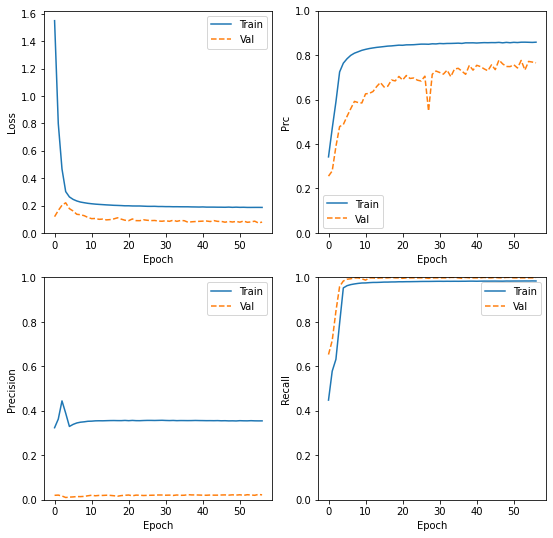

In [ ]:
plot_metrics(oversampled_history)

In [ ]:
test_metrics_oversampled = oversampled_model.evaluate(X_test, y_test, 2048)
test_predictions_oversampled = oversampled_model.predict(X_test, 2048)
np.rint(test_predictions_oversampled, test_predictions_oversampled)
test_predictions_oversampled = test_predictions_oversampled.astype('uint8')

train_predictions_oversampled = oversampled_model.predict(X_train, 2048)
np.rint(train_predictions_oversampled, train_predictions_oversampled)
train_predictions_oversampled = train_predictions_oversampled.astype('uint8')

291/291 [==============================] - 2s 5ms/step - loss: 0.0793 - tp: 540.0000 - fp: 24475.0000 - tn: 570329.0000 - fn: 7.0000 - accuracy: 0.9589 - precision: 0.0216 - recall: 0.9872 - auc: 0.9939 - prc: 0.7597


loss :  0.07928137481212616
tp :  540.0
fp :  24475.0
tn :  570329.0
fn :  7.0
accuracy :  0.9588780403137207
precision :  0.02158704772591591
recall :  0.9872029423713684
auc :  0.9939138293266296
prc :  0.7596729397773743


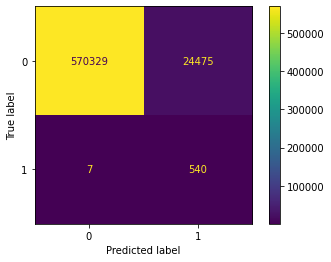

In [ ]:
for metric_name, metric_value in zip(oversampled_model.metrics_names, test_metrics_oversampled):
  print(metric_name, ": ", metric_value)

ConfusionMatrixDisplay.from_predictions(y_test, test_predictions_oversampled)
plt.show()

### Plot the ROC and AUPRC

In [ ]:
def plot_roc(name, labels, predictions, color, ax, **kwargs):
  fp, tp, _ = roc_curve(labels, predictions)
  ax.set_title("FP vs TP")
  ax.plot(100*fp, 100*tp, label=name, linewidth=2, color=color, **kwargs)
  ax.set_xlabel('False positives [%]')
  ax.set_ylabel('True positives [%]')
  ax.grid(True)
  ax.set_aspect('equal')
  ax.legend(loc='lower right')

In [ ]:
def plot_prc(name, labels, predictions, color, ax, **kwargs):
  precision, recall, _ = precision_recall_curve(labels, predictions)
  ax.set_title("Recall vs Precision")
  ax.plot(precision, recall, label=name, linewidth=2, color=color, **kwargs)
  ax.set_xlabel('Precision')
  ax.set_ylabel('Recall')
  ax.grid(True)
  ax.set_aspect('equal')
  ax.legend(loc='upper right')

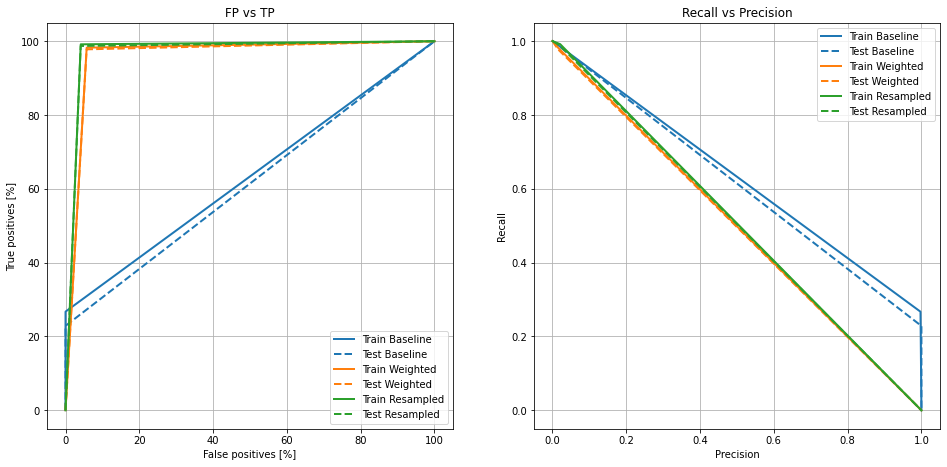

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

plot_roc("Train Baseline", y_train, train_predictions, color=colors[0], ax=ax1)
plot_roc("Test Baseline", y_test, test_predictions, color=colors[0], linestyle='--', ax=ax1)
plot_roc("Train Weighted", y_train, train_predictions_weighted, color=colors[1], ax=ax1)
plot_roc("Test Weighted", y_test, test_predictions_weighted, color=colors[1], linestyle='--', ax=ax1)
plot_roc("Train Resampled", y_train, train_predictions_oversampled, color=colors[2], ax=ax1)
plot_roc("Test Resampled", y_test, test_predictions_oversampled, color=colors[2], linestyle='--', ax=ax1)

plot_prc("Train Baseline", y_train, train_predictions, color=colors[0], ax=ax2)
plot_prc("Test Baseline", y_test, test_predictions, color=colors[0], linestyle='--', ax=ax2)
plot_prc("Train Weighted", y_train, train_predictions_weighted, color=colors[1], ax=ax2)
plot_prc("Test Weighted", y_test, test_predictions_weighted, color=colors[1], linestyle='--', ax=ax2)
plot_prc("Train Resampled", y_train, train_predictions_oversampled, color=colors[2], ax=ax2)
plot_prc("Test Resampled", y_test, test_predictions_oversampled, color=colors[2], linestyle='--', ax=ax2)

In [ ]:
best_model = tf.keras.models.load_model('fraud_detection_model.keras')

### Additional - Trying AutoEncoder

In [7]:
df2 = pd.get_dummies(df, columns = ['type'], drop_first = True)
df2.drop(columns=cust_cols, inplace=True)
df2.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,1,0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,0,1,0


In [8]:
y = df2.pop('isFraud').astype('uint8').to_numpy()

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df2, y, test_size=0.1, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, stratify=y_train, random_state=42)

Normalize the data to [0, 1]

In [11]:
scaler = MinMaxScaler()

X_train[con_cols] = scaler.fit_transform(X_train[con_cols])
X_test[con_cols] = scaler.transform(X_test[con_cols])
X_val[con_cols] = scaler.transform(X_val[con_cols])

Training autoencoder only on non fraudulent transactions

In [13]:
fraud_train = y_train==1
fraud_test = y_test==1
fraud_val = y_val==1

notfraud_X_train = X_train[~fraud_train]
notfraud_X_test = X_test[~fraud_test]
notfraud_X_val = X_val[~fraud_val]

fraud_X_train = X_train[fraud_train]
fraud_X_test = X_test[fraud_test]
fraud_X_val = X_val[fraud_val]

Calculating mean to initialize bias

In [16]:
mean = notfraud_X_train.describe().loc['mean'].to_numpy()
output_bias = tf.keras.initializers.Constant(mean)

In [32]:
autoencoder_metrics = ['mean_squared_error',
                      #  'mean_absolute_error', loss is same as mae
                       'mean_absolute_percentage_error',
                       'mean_squared_logarithmic_error',
                       'cosine_similarity',
                       'logcosh']

class AnomalyDetector(tf.keras.Model):
  def __init__(self):
    super(AnomalyDetector, self).__init__()
    self.encoder = tf.keras.Sequential([
      tf.keras.layers.Dense(8, activation="relu"),
      tf.keras.layers.Dense(3, activation="relu")])

    self.decoder = tf.keras.Sequential([
      tf.keras.layers.Dense(8, activation="relu"),
      tf.keras.layers.Dense(11, activation="relu", bias_initializer=output_bias)])

  def call(self, inputs):
    encoder = self.encoder(inputs)
    decoder = self.decoder(encoder)
    return decoder

  def get_model(self):
    inputs = tf.keras.Input((11,))
    model = tf.keras.Model(inputs=inputs, outputs=self.call(inputs), name='auto_encoder')
    model.compile(optimizer=tf.keras.optimizers.Adam(),
                loss='mae',
                metrics=autoencoder_metrics)
    return model

In [33]:
autoencoder = AnomalyDetector().get_model()

In [34]:
autoencoder.summary()

Model: "auto_encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 11)]              0         
                                                                 
 sequential_6 (Sequential)   (None, 3)                 123       
                                                                 
 sequential_7 (Sequential)   (None, 11)                131       
                                                                 
Total params: 254
Trainable params: 254
Non-trainable params: 0
_________________________________________________________________


In [35]:
autoencoder_callbacks = [
             tf.keras.callbacks.ModelCheckpoint('autoencoder.keras',
                                                monitor='val_loss',
                                                save_best_only=True,
                                                mode='min'),
             tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=10,
                                              mode='min',
                                              restore_best_weights=True)
]

In [36]:
history = autoencoder.fit(notfraud_X_train, notfraud_X_train, 2048, 500, callbacks=autoencoder_callbacks, validation_data=(notfraud_X_val, notfraud_X_val))

Epoch 1/500
2353/2353 [==============================] - 11s 4ms/step - loss: 0.0211 - mean_squared_error: 0.0101 - mean_absolute_percentage_error: 1525100.6250 - mean_squared_logarithmic_error: 0.0048 - cosine_similarity: 0.9177 - logcosh: 0.0046 - val_loss: 0.0079 - val_mean_squared_error: 0.0035 - val_mean_absolute_percentage_error: 2519.7583 - val_mean_squared_logarithmic_error: 0.0019 - val_cosine_similarity: 0.9471 - val_logcosh: 0.0016
Epoch 2/500
2353/2353 [==============================] - 10s 4ms/step - loss: 0.0078 - mean_squared_error: 0.0035 - mean_absolute_percentage_error: 1359.2272 - mean_squared_logarithmic_error: 0.0019 - cosine_similarity: 0.9471 - logcosh: 0.0016 - val_loss: 0.0077 - val_mean_squared_error: 0.0035 - val_mean_absolute_percentage_error: 1268.7828 - val_mean_squared_logarithmic_error: 0.0019 - val_cosine_similarity: 0.9471 - val_logcosh: 0.0016
Epoch 3/500
2353/2353 [==============================] - 16s 7ms/step - loss: 0.0078 - mean_squared_error: 0.

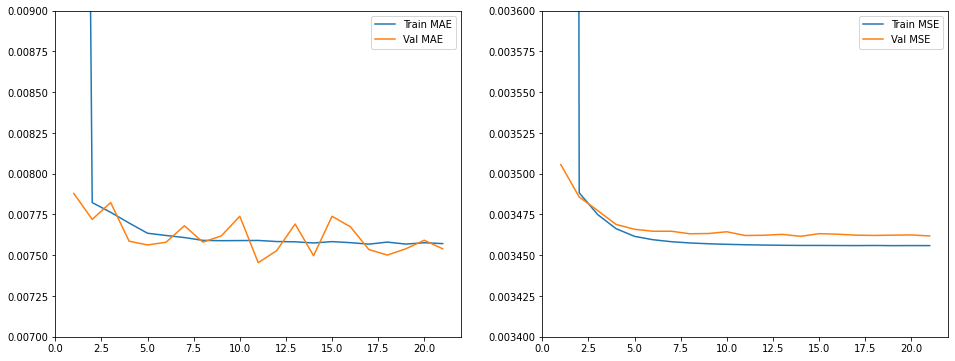

In [44]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

mae_loss = history.history['loss']
val_mae_loss = history.history['val_loss']
mse = history.history['mean_squared_error']
val_mse = history.history['val_mean_squared_error']
epochs = range(1, len(history.history['loss'])+1)

ax1.plot(epochs, mae_loss, label='Train MAE')
ax1.plot(epochs, val_mae_loss, label='Val MAE')
ax1.legend()
ax1.set_ylim(0.007, 0.009)

ax2.plot(epochs, mse, label='Train MSE')
ax2.plot(epochs, val_mse, label='Val MSE')
ax2.legend()
ax2.set_ylim(0.0034, 0.0036)

plt.show()

In [ ]:
encoded_data = autoencoder.encoder(notfraud_X_test).numpy()
decoded_data = autoencoder.decoder(encoded_data).numpy()

encoded_data = autoencoder.encoder(fraud_X_test).numpy()
decoded_data = autoencoder.decoder(encoded_data).numpy()

**Detect Anomalies**

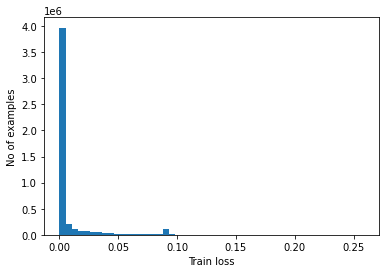

In [45]:
reconstructions = autoencoder.predict(notfraud_X_train)
train_loss = tf.keras.losses.mae(reconstructions, notfraud_X_train)

plt.hist(train_loss[None,:], bins=50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

Choosing a threshold value that is one standard deviations above the mean.

In [46]:
threshold = np.mean(train_loss) + np.std(train_loss)
print("Threshold: ", threshold)

Threshold:  0.026608462966212703


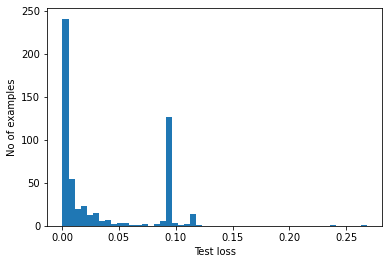

In [47]:
reconstructions = autoencoder.predict(fraud_X_test)
test_loss = tf.keras.losses.mae(reconstructions, fraud_X_test)

plt.hist(test_loss[None, :], bins=50)
plt.xlabel("Test loss")
plt.ylabel("No of examples")
plt.show()

In [54]:
def predict(model, data, threshold):
  reconstructions = model.predict(data)
  loss = tf.keras.losses.mae(reconstructions, data)
  return tf.math.less(loss, threshold)

def print_stats(predictions, labels):
  print("TP = {}".format(metrics[0](labels, predictions)))
  print("FP = {}".format(metrics[1](labels, predictions)))
  print("TN = {}".format(metrics[2](labels, predictions)))
  print("FN = {}".format(metrics[3](labels, predictions)))
  print("Accuracy = {}".format(metrics[4](labels, predictions)))
  print("Precision = {}".format(metrics[5](labels, predictions)))
  print("Recall = {}".format(metrics[6](labels, predictions)))
  print("AUCROC = {}".format(metrics[7](labels, predictions)))
  print("AUPRC = {}".format(metrics[8](labels, predictions)))

TP = 349.0
FP = 546490.0
TN = 48314.0
FN = 198.0
Accuracy = 0.08173833787441254
Precision = 0.000638213416095823
Recall = 0.6380255818367004
AUCROC = 0.3596261739730835
AUPRC = 0.0006904315087012947


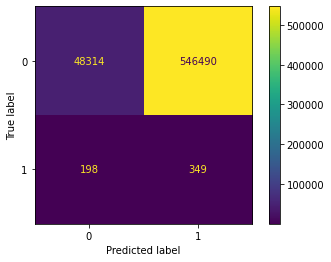

In [55]:
preds = predict(autoencoder, X_test, threshold)
print_stats(preds, y_test)

ConfusionMatrixDisplay.from_predictions(y_test, preds)
plt.show()

Our AutoEncoder did not perform better than the neural network classifier